# Изучение рынка заведений общественного питания Москвы

- Автор:   Юрий Кузнецов
- Дата: 23.02.2025

###  Цели и задачи проекта
**Цель**: Провести исследовательский анализ рынка общественного питания города Москвы, чтобы помочь заказчику, инвесторами из фонда Shut Up and Take My Money, определиться с типом, местоположением и ценовой категорией будущего заведения общественного питания в Москве.

**Задачи**:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных
4. Сформулировать выводы по проведённому анализу.

### Описание данных



**Данные**: В нашем распоряжении 2 файла `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания и `/datasets/rest_price.csv` с информацией о среднем чеке в заведениях общественного питания:

**Описание `/datasets/rest_price.csv`**:

- `name` — название заведения
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- `seats` — количество посадочных мест.

**Описание `/datasets/rest_price.csv`**:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца
- `avg_bill`, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца 'avg_bill', начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек pandas, matplotlib и seaborn, а также phik для построения матрицы корреляции.

In [1]:
 !pip install phik 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

Загрузим датасеты `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Будем использовать  Данные датасетов сохраним в двух переменных: df_info и df_prices.

In [3]:
df_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_prices = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `df_info` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Посмотрим информацию о датафрейме

In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет из 8406 строк в 9 столбцах содержит общую информацию о заведениях общественного питания
Первичное знакомство с датасетом позволяет сделать следующие выводы:
- Все имена столбцов имеют корректный вид 
- Представленные данные содержат числовые значения в столбцах `rating` `chain` `seats` и хранятся в типах данных int64 или float64. Столбец `chain` представлен бинарными значениями. Так как значения в этих столбцах невысокие, то можно понизить разрядность.
- Столбцы `category` и `district`содержат ограниченное число категорий, поэтому их возможно привести к типу данных 'category'
- Остальные столбцы имеют корректный тип данных 'object'
- В столбцах `hours` и `seats` имеются пропуски, в последнем значительные
- Значения в столбцах соответствуют описанию

Ознакомимся с данными датасета `df_prices`

In [6]:
df_prices.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет из 4058 строк в 5 столбцах содержит информацию о ценах в заведениях общественного питания Москвы.
- Названия столбцов соответствуют описанию
- Имеют корректный формат 'snake_case'
- Содержит значительное количество пропусков во всех столбцах, кроме `id`
- Тип данных в столбце `price`, содержащий ценовые категории - 'object' можно привести к типу 'category' 
- Данные датасета `df_prices` неполны и не соостветствуют объему датасета `df_info`. В нем представлены далеко не все заведения общественного питания. 

Первичное знакомство показывает, что данные имеют много пропущенных значений, число строк в датасете `df_info` 8406 более чем вдвое превышает число строк в `df_prices` 4058. Будем располагать тем, что имеем.В описании проекта было упомянуто, что информация добавлена пользователями или найдена в общедоступных источниках и носит исключительно справочный характер. Сами данные соответствуют описанию и выглядят корректными

### Подготовка единого датафрейма

Для исследования нам понадобится единый датасет с максимальным объемом данных, поэтому объединим датафреймы с информацией `df_info` и ценами `df_prices` по левому типу 

In [8]:
df = pd.merge(df_info, df_prices, on = 'id', how = 'left')

In [9]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Объединенный датафрейм имеет 8406 строк и 13 столбцов. Информация обо всех заведениях общественного питания сохранилась.

## Предобработка данных

### Оптимизируем типы данных

- Тип данных в столбце `price`, содержащий ценовые категории - 'object' можно привести к типу 'category' 
- Столбцы `category` и `district` содержат ограниченное число значений, поэтому их возможно также привести к типу данных 'category'
- Представленные данные содержат числовые значения в столбцах `middle_coffee_cup`, `middle_avg_bill`, `rating`, `chain`, `seats` и хранятся в типах данных int64 или float64. Столбец chain представлен бинарными значениями. Так как значения в этих столбцах невысокие, то можно понизить разрядность.

In [11]:
# Оптимизируем целочисленный тип данных в столбце `chain`
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [12]:
# Приводим значения в `seats` к целочисленному типу
df['seats'] = df['seats'].astype('Int32')

In [13]:
# Приводим значения в `middle_avg_bill` к целочисленному типу
df['middle_avg_bill'] = df['middle_avg_bill'].astype('Int32')

In [14]:
# Приводим значения в `middle_coffee_cup` к целочисленному типу
df['middle_coffee_cup'] = df['middle_coffee_cup'].astype('Int32')

In [15]:
# Приводим столбцы с ограниченным набором значений к типу данных 'category'
for column in ['price','category','district']:
    df[column] = df[column].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   category
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   Int32   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   Int32   
 12  middle_coffee_cup  535 non-null    Int32   
dtypes: Int32(3), category(3), float64(1), int8(1), object(5)
memory usage: 551.0+ KB


Типы данных были успешно оптимизированы с понижением размерности целочисленных данных.

### Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбце `hours` датафрейма df. Узнаем абсолютное и относительное количество пропусков в общем датасете.

In [17]:
missing = (pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Процент пропусков': round(df.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Процент пропусков
middle_coffee_cup,7871,93.600000
middle_avg_bill,5257,62.500000
price,5091,60.600000
avg_bill,4590,54.600000
seats,3611,43.000000
hours,536,6.400000
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000


Общий датасет имеет большое число пропусков, что очевидно вследствие разного объема предоставленных датасетов и учитывая, что информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках и не собиралась для целенапрвленного исследования в полном объеме. 

Чтобы не потерять большую часть данных принято решение пропуски не удалять и оставить как есть.  

Проверим в столбце `hours` значения 'ежедневно, круглосуточно'

In [18]:
sum(df['hours'].str.lower() == 'ежедневно, круглосуточно')

730

Создаем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [19]:
def round_or_not(row):
    if row == 'ежедневно, круглосуточно':
        return True
    else:
        return False
df['is_24_7'] = df['hours'].apply(round_or_not)

In [20]:
print('Число заведений круглосуточного типа:', df['is_24_7'].sum())
print('Процент заведений круглосуточного типа от общего числа заведений:', round(df['is_24_7'].sum()/df.shape[0], 3)*100, '%' )

Число заведений круглосуточного типа: 730
Процент заведений круглосуточного типа от общего числа заведений: 8.7 %


### Явные и неявные дубликаты в данных

Для оптимизации проверки нормализуем данные в текстовых столбцах

In [21]:
# Приведем данные текстовых столбцах df
for column in ['name', 'category', 'address', 'district', 'price']:
    df[column]=df[column].apply(lambda x:x.lower().strip())

In [22]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,<NA>,<NA>,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550,<NA>,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000,<NA>,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,<NA>,170,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500,<NA>,False


In [23]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по id заведений должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [24]:
# Проверяем неявные дубликаты в столбце 'id'
df.duplicated(subset='id').sum()

0

In [25]:
# Проверяем неявные дубликаты в столбце 'name'
df.duplicated(subset='name').sum()

2894

Названия заведений могут совпадать, к тому же нужно учесь большое число сетевых заведений с одним названием

In [26]:
# Проверяем неявные дубликаты в столбце 'address'
df.duplicated(subset='address').sum()

2654

По одному адресу вполне могут располагаться более одного заведения. Поэтому проверим наличие дубликатов одновременно по названию и адресу:

In [27]:
# Проверяем неявные дубликаты в столбцах 'name' и 'address'
df.duplicated(subset=['name', 'address']).sum()

4

Найдено 4 неявных дубликата

In [28]:
#Удаляем строки с этими дубликатами
df.drop_duplicates(subset=['name', 'address'], inplace=True)

In [29]:
#Выводим информацию о датасете после предобработки
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8402 non-null   object  
 1   name               8402 non-null   object  
 2   category           8402 non-null   category
 3   address            8402 non-null   object  
 4   district           8402 non-null   category
 5   hours              7867 non-null   object  
 6   rating             8402 non-null   float64 
 7   chain              8402 non-null   int8    
 8   seats              4792 non-null   Int32   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   Int32   
 12  middle_coffee_cup  535 non-null    Int32   
 13  is_24_7            8402 non-null   bool    
dtypes: Int32(3), bool(1), category(3), float64(1), int8(1), object(5)
memory usage: 624.5+ KB


---

### Промежуточный вывод


- Типы данных были оптимизированы с понижением размерности целочисленных данных и приведением столбцов с ограниченным набором значений к типу 'category'
- Общий датасет имеет большое число пропусков, что очевидно вследствие разного объема предоставленных датасетов и учитывая, что информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках и не собиралась специально в полном объеме.
- Было принято решение пропуски не удалять и оставить как есть, чтобы не потерять значительную часть ценных данных. 
- Создали столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно. Процент заведений круглосуточного типа от общего числа заведений: 8.7 %
- Явных дубликатов не обнаружено, но после нормализации формата значений в текстовых столбцах, обнаружили 4 неявных, которые были удалены
- После предобработки данных датасет содержит 8402 строки и 14 столбцов

## Исследовательский анализ данных

---

### Задача 1

В датасете представлены данные категориального типа в столбцах `category`, `chain`, `price`
Исследуем количество объектов общественного питания по каждой категории

In [30]:
df_cat= pd.DataFrame({'Количество': df['category'].value_counts(), 'Процент': round(df['category'].value_counts(normalize=True), 3)*100}).style.background_gradient(cmap='coolwarm')
df_cat

,Количество,Процент
category,,
кафе,2376,28.300000
ресторан,2042,24.300000
кофейня,1413,16.800000
"бар,паб",764,9.100000
пиццерия,633,7.500000
быстрое питание,603,7.200000
столовая,315,3.700000
булочная,256,3.000000


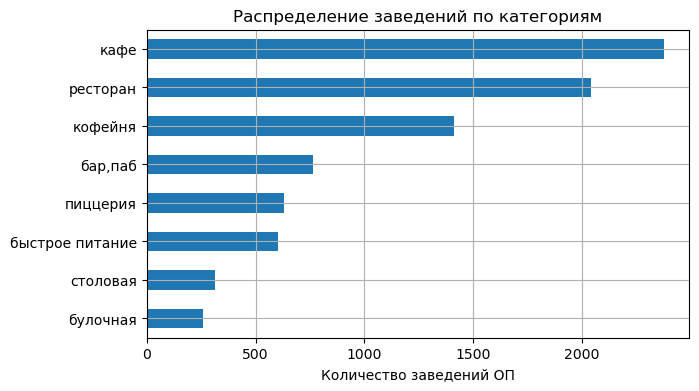

In [31]:
plt.figure(figsize=(7, 4))
df['category'].value_counts().sort_values(ascending=True).plot(
               kind='barh',
               rot=0, 
               legend=False, 
               title=f'Распределение заведений по категориям',
)
plt.xlabel('Количество заведений ОП')
plt.ylabel(None)
plt.grid()
plt.show()

На рынке общественного питания Москвы преобладают категории кафе(2376, 28.3 %), ресторан(2042, 24.3 %), кофейня(1413, 16.8 %)

In [32]:
df['chain'].value_counts()

chain
0    5199
1    3203
Name: count, dtype: int64

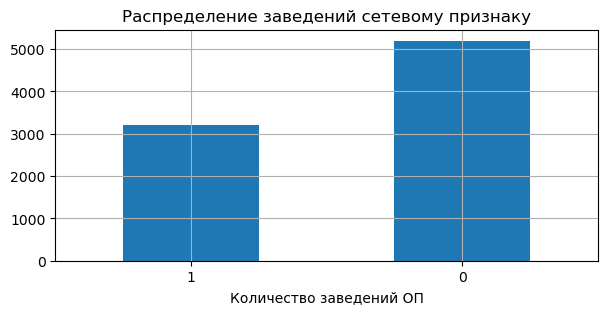

In [33]:
plt.figure(figsize=(7, 3))
df['chain'].value_counts().sort_values(ascending=True).plot(
               kind='bar',
               rot=0, 
               legend=False, 
               title=f'Распределение заведений сетевому признаку',
)
plt.xlabel('Количество заведений ОП')
plt.grid()
plt.show()

Количество несетевых заведений(5199) превышает число сетевых (3203)

In [34]:
df['price'].value_counts()

price
средние          2117
выше среднего     564
высокие           478
низкие            156
Name: count, dtype: int64

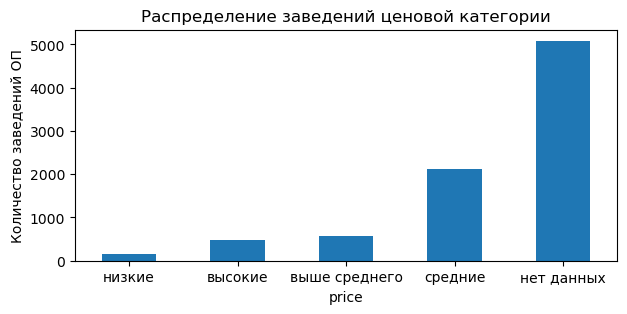

In [68]:
plt.figure(figsize=(7, 3))
df['price'].value_counts().sort_values(ascending=True).plot(
               kind='bar',
               rot=0, 
               legend=False, 
               title=f'Распределение заведений ценовой категории',
)
plt.ylabel('Количество заведений ОП')

plt.show()

С большим отрывом преобладают заведения ОП среднего ценового диапазона (2117). Заведений с низкими ценами меньше всего (156)

---

### Задача 2

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

Выводим число и долю заведений по округам

In [36]:
df_ao = pd.DataFrame({'Количество': df['district'].value_counts(), 'Процент': round(df['district'].value_counts(normalize=True), 3)*100}).style.background_gradient(cmap='coolwarm')
df_ao

,Количество,Процент
district,,
центральный административный округ,2242,26.700000
северный административный округ,898,10.700000
южный административный округ,892,10.600000
северо-восточный административный округ,890,10.600000
западный административный округ,850,10.100000
восточный административный округ,798,9.500000
юго-восточный административный округ,714,8.500000
юго-западный административный округ,709,8.400000
северо-западный административный округ,409,4.900000


Визуализируем распределение на линейчатой диаграмме

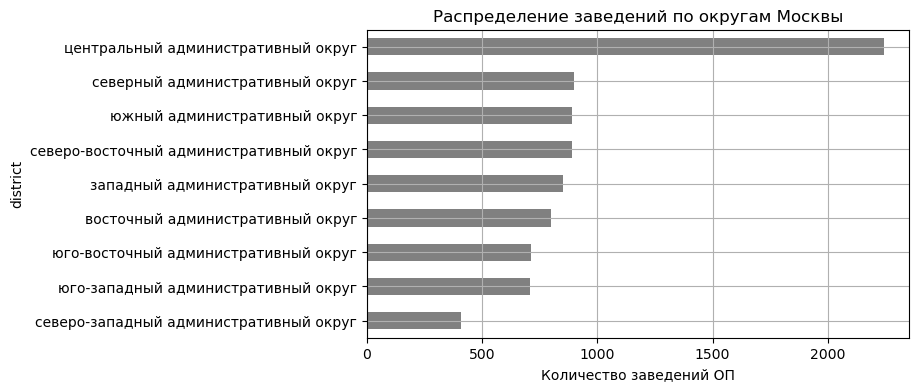

In [37]:
plt.figure(figsize=(7, 4))
df['district'].value_counts().sort_values(ascending=True).plot(
               kind='barh',
               rot=0, 
               legend=False,
               color='grey',
               title=f'Распределение заведений по округам Москвы',
)
plt.xlabel('Количество заведений ОП')
plt.grid()
plt.show()

Рынок общественного питания Москвы сегментируется 9 административными округами. Максимальная концентрация объектов ОП сконцентрированиа в Центральном административном округе Москвы (2242). Минимальная в Северо-западном (409)

Выведем общую информацию о заведениях а Центральном административном огруге ЦАО

In [38]:
df_cao = df[df['district'] == 'центральный административный округ']
df_cao['category'].value_counts().sort_values(ascending=False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

Отобразим распределение категорий заведений в ЦАО

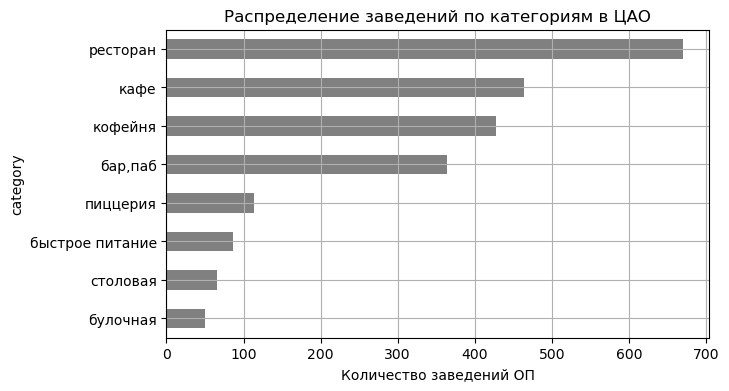

In [39]:
df_cao = df[df['district'] == 'центральный административный округ']
plt.figure(figsize=(7, 4))
df_cao['category'].value_counts().sort_values(ascending=True).plot(
               kind='barh',
               rot=0, 
               legend=False, 
               color='grey',
               title=f'Распределение заведений по категориям в ЦАО',
)
plt.xlabel('Количество заведений ОП')
plt.grid()
plt.show()

Наиболее часто встречающиеся категории завадений в ЦАО - рестораны(670), кафе(464) и кофейни(428)

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 

Выведем общую информацию о заведениях

In [40]:
print('Общее количество заведений общественного питания:', df.shape[0])
print('Количество несетевых заведений ОП:', df.shape[0] - df['chain'].sum())
print('Количество сетевых заведений ОП:', df['chain'].sum())
print('Процент сетевых заведений ОП от общего числа заведений:', round(df['chain'].sum()/df.shape[0], 3)*100,'%')


Общее количество заведений общественного питания: 8402
Количество несетевых заведений ОП: 5199
Количество сетевых заведений ОП: 3203
Процент сетевых заведений ОП от общего числа заведений: 38.1 %


Несетевых заведений больше, процент сетевых составляет 38.1 % от общего числа объектов ОП

Выведем распределение и отношение сетевых и несетевых заведений ОП

In [41]:
set_df = df[df['chain']==1]
not_set_df = df[df['chain']==0]
chain_count = (pd.DataFrame({'Кол-во сетевых': set_df['category'].value_counts(), 
                             'Кол-во несетевых':not_set_df['category'].value_counts(),
                             'Доля сетевых от несетевых': 
                             round(set_df['category'].value_counts()/not_set_df['category'].value_counts(), 2),
                             'Процент сетевых': round(set_df['category'].value_counts()/(set_df['category'].value_counts()+not_set_df['category'].value_counts()), 3)*100
                            }).sort_values(by = 'Доля сетевых от несетевых', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
chain_count

,Кол-во сетевых,Кол-во несетевых,Доля сетевых от несетевых,Процент сетевых
category,,,,
булочная,157,99,1.590000,61.300000
пиццерия,330,303,1.090000,52.100000
кофейня,720,693,1.040000,51.000000
быстрое питание,232,371,0.630000,38.500000
ресторан,729,1313,0.560000,35.700000
кафе,779,1597,0.490000,32.800000
столовая,88,227,0.390000,27.900000
"бар,паб",168,596,0.280000,22.000000


Визуализируем распределение категорий в зависимости от сетевого признака в виде линейчатой диаграммы

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\803587773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0).sort_values(by=0)


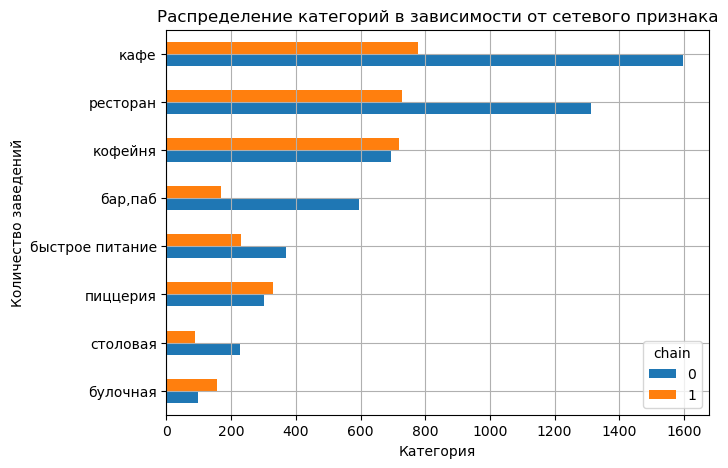

In [42]:

grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0).sort_values(by=0)
grouped.plot(kind='barh',
               title=f'Распределение категорий в зависимости от сетевого признака',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=0,
               figsize=(7, 5))
plt.grid()

# Выводим график
plt.show()

Наиболее распространенные сетевые заведения кафе(779), рестораны(729) и кофейни(720)
Чаще являются сетевыми булочные(61,3 %), пиццерии(52,1 %) и кофейни(51 %)

Визуализируем распределение заведений по округам в разрезе сетевого признака

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\722197329.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('district')['chain'].value_counts().unstack(fill_value=0).sort_values(by=0)


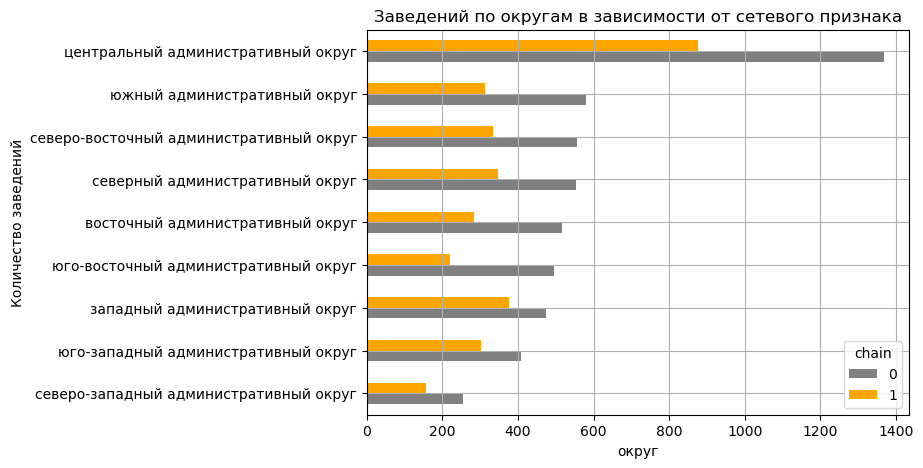

In [43]:

grouped = df.groupby('district')['chain'].value_counts().unstack(fill_value=0).sort_values(by=0)
grouped.plot(kind='barh',
               title=f'Заведений по округам в зависимости от сетевого признака',
               legend=True,
               ylabel='Количество заведений',
               xlabel='округ',
               rot=0,
               color = ['grey','orange'],
               figsize=(7, 5))
plt.grid()

# Выводим график
plt.show()

Юго-восточный, Восточный и Южный - административные округа, в которых наименьшая доля сетевых заведений по сравнению с несетевыми

Посчитаем процент сетевых зыведений по округам

In [44]:
grouped = df.groupby('district')['chain'].value_counts().unstack(fill_value=0).sort_values(by=0)
percent_set = round(grouped[1]/(grouped[1]+grouped[0]), 3)*100
percent_set.sort_values()

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\3218263940.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('district')['chain'].value_counts().unstack(fill_value=0).sort_values(by=0)


district
юго-восточный административный округ       30.8
южный административный округ               35.0
восточный административный округ           35.5
северо-восточный административный округ    37.4
северо-западный административный округ     38.1
северный административный округ            38.5
центральный административный округ         39.0
юго-западный административный округ        42.6
западный административный округ            44.2
dtype: float64

Самые неразвитые по сетевому признаку заведений ОП округи Москвы `юго-восточный` 30.8 %, `южный` 35.0 %, `восточный` 35.5 %


---

### Задача 4

Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводим подходящими визуализациями.


Посмотрим статистические данные столбца `seats`

In [45]:
df['seats'].describe()

count        4792.0
mean     108.361436
std       122.84113
min             0.0
25%            40.0
50%            75.0
75%           140.0
max          1288.0
Name: seats, dtype: Float64

Значительное отличие медианного 75 и среднего значения 108, максимальное значение 1288, большое стандартное отклонение 123 свидетельствуют о крайне неравномерном распределении значений

Построим гистограмму распределения значений числа мест в заведениях ОП

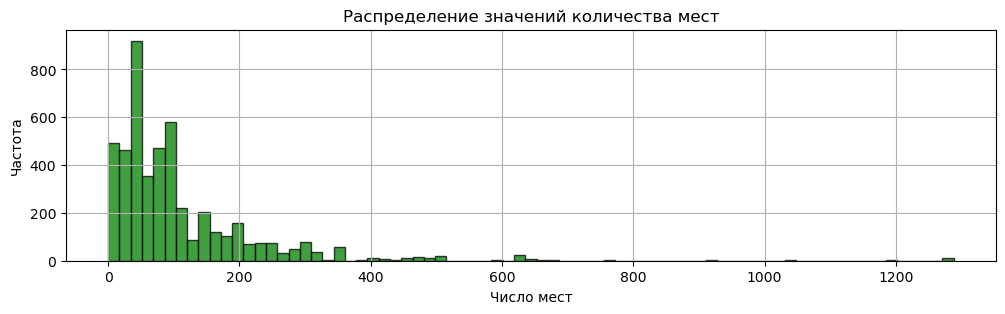

In [46]:
plt.figure(figsize=(12, 3))
df['seats'].plot(
                kind='hist', 
                bins=75, 
                alpha=0.75,
                edgecolor='black',
                color='green',
                rot=0, 
)
plt.title('Распределение значений количества мест')
plt.xlabel('Число мест')
plt.ylabel('Частота')
plt.grid()
plt.show()

Гистограмма имеет правосимметричное распределение. Основной объем значений сфокусирован примерно между 0 и 250 посадочных мест

Строим диаграмму размаха значений в столбце `seats`

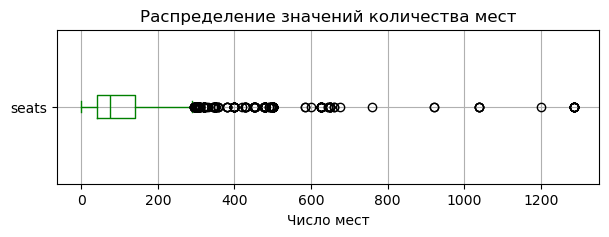

In [47]:
plt.figure(figsize=(7, 2))
df.boxplot(column='seats', color='green', vert=False)
plt.title('Распределение значений количества мест')
plt.xlabel('Число мест')
plt.show()

На диаграмме размаха видны единичные выбросы в сторону аномально больших значений. Что впрочем тажке может быть связано со спецификой некоторых заведений города Москвы

Чтобы получить более достоверную статистику, отфильтруем выбросы аномальных значений, а также нулевые значения в столбце `seats`

In [48]:
df_outfliers_filtered = df[(df['seats']<df['seats'].quantile(0.95))&(df['seats']>0)]

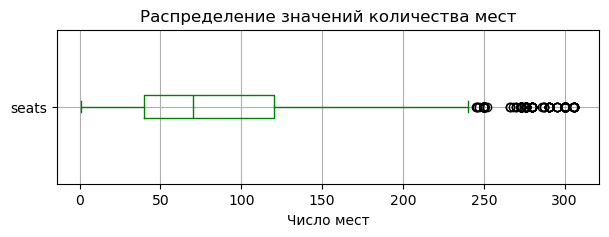

In [49]:
plt.figure(figsize=(7, 2))
df_outfliers_filtered.boxplot(column='seats', color='green', vert=False)
plt.title('Распределение значений количества мест')
plt.xlabel('Число мест')
plt.show()

Выведем медианные и средние значения посадочных мест в разрезе категорий объектов ОП по отфильтрованному датасету `df_outfliers_filtered`

In [50]:
df_outfliers_filtered.groupby('category')['seats'].agg(['median', 'mean']).sort_values(by = 'mean', ascending=False)

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\2910736746.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_outfliers_filtered.groupby('category')['seats'].agg(['median', 'mean']).sort_values(by = 'mean', ascending=False)


,median,mean
category,,
ресторан,80.0,101.513191
"бар,паб",80.0,95.573086
кофейня,75.5,93.100291
быстрое питание,70.0,90.608833
булочная,50.0,86.360902
столовая,75.0,84.052632
кафе,60.0,81.464222
пиццерия,52.0,80.99


Так как распределение значений посадочных мест имеет крайне неравномерный вид, то наиболее типичным числом посадочных мест по категориям заведений будем считать медианное значение

Отобразим распределение медианного значения посадочных мест по категориям заведений общественного питания

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\3371898560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_outfliers_filtered.groupby('category')['seats'].median().sort_values(ascending=True).plot(


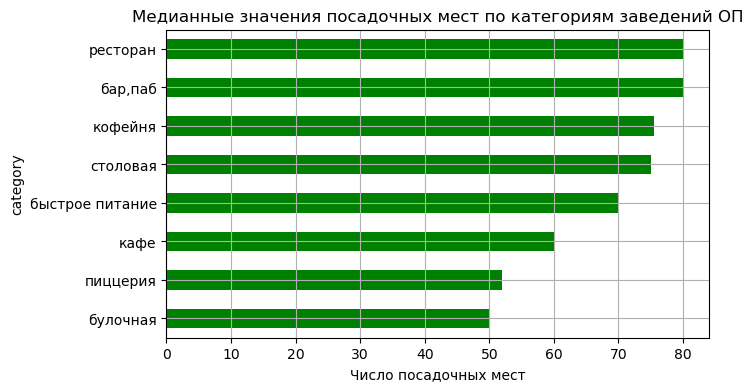

In [51]:

plt.figure(figsize=(7, 4))
df_outfliers_filtered.groupby('category')['seats'].median().sort_values(ascending=True).plot(
               kind='barh',
               rot=0, 
               legend=False, 
               color='green',
               title=f'Медианные значения посадочных мест по категориям заведений ОП'
)
plt.xlabel('Число посадочных мест')
plt.grid()
plt.show()

В ресторанах (80), кофейнях (75) и бар,пабах (80) наибольшее число посадочных мест. В скобках медианное значение числа мест.

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Выведем средний рейтинг для каждой категории заведений

In [52]:
df.groupby('category')['rating'].mean().sort_values(ascending=False)

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\2831152434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['rating'].mean().sort_values(ascending=False)


category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

И отобразим на линейчатой диаграмме

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\2734772046.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['rating'].mean().sort_values(ascending=True).plot(


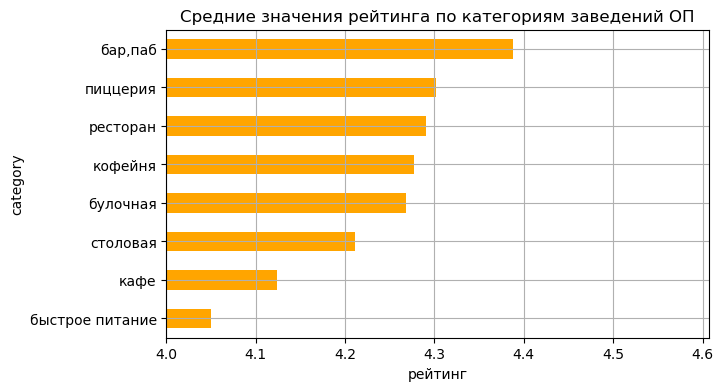

In [53]:

 
plt.figure(figsize=(7, 4))
df.groupby('category')['rating'].mean().sort_values(ascending=True).plot(
               kind='barh',
               rot=0, 
               legend=False, 
               xlim=4,
               color='orange',
               title=f'Средние значения рейтинга по категориям заведений ОП',
)
plt.xlabel('рейтинг')
plt.grid()
plt.show()

Средний рейтинг всех категорий заведений находится небольших в пределах от 4 до 4.4. Среди них выделяются бар,пабы (4,38), пиццерии (4,30) и рестораны (4,29) имеющие самый высокий средний рейтинг. Категории быстрого питания (4,05), кафе (4,12) и столовые (4,21) имеют более низкий рейтинг. 

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построим и визуализируеме матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

Создадим матрицу корреляции данных `category`, `district`, `chain`, `seats`, `price`, `is_24_7`, `rating` и построим на ее основе тепловую карту для признака `rating`

interval columns not set, guessing: ['chain', 'seats', 'rating']


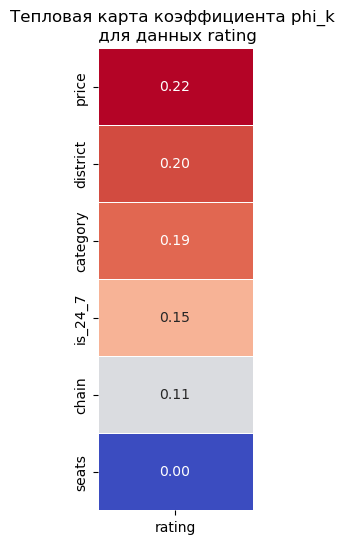

In [54]:
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False 
           )
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.show()

Самая сильная корреляция рейтинга наблюдается с ценовой категорией `price` местоположением `district` и категорией заведения ОП  `category`

Проверим самую сильную связь `rating` и `price`.
Оценим плотность вероятности с помощью кривых KDE для рейтинга по каджой ценовой категории заведений

In [55]:
df['price']=df['price'].astype('object').fillna('нет данных')

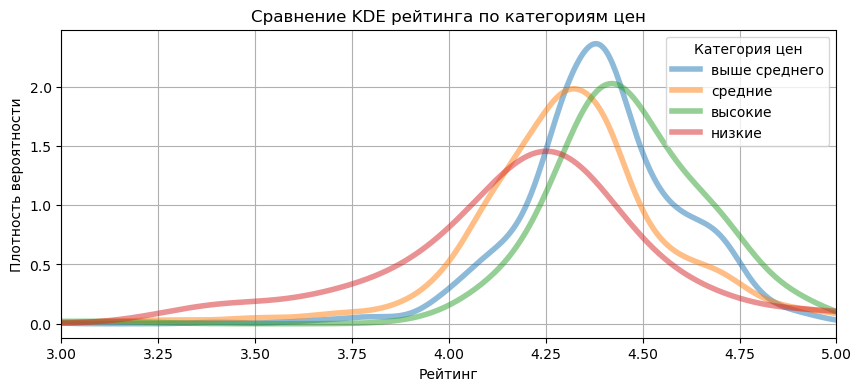

In [56]:
plt.figure(figsize=(10, 4))
for i in df['price'].unique():
    if i == 'нет данных':
        continue
    df.loc[df['price'] == i, 'rating'].plot(
        kind='kde',
        alpha=0.5,
        label=f'{i}',
        legend=True,
        xlim=[3,5],
        linewidth=4)
plt.title(f'Сравнение KDE рейтинга по категориям цен')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность вероятности')
plt.legend(title='Категория цен')
plt.grid()
plt.show()

Отслеживается корреляция между ценовой категорией и рейтингом заведения: чем выше ценовая категория заведения ОП, тем выше его пиковый рейтинг и тем меньше диапазон значений рейтинга

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводим подходящими визуализациями.

Создадим сводную таблицу включающую название сетевого заведения, его категорию, число объектов и средний рейтинг

In [57]:
pivot_chain_est =  pd.pivot_table(df[df['chain']== 1],
                             index=['name', 'category'],
                             values=['id','rating'],
                             aggfunc={'id':'count','rating':'mean'}).sort_values(by='id', ascending=False) 
pivot_chain_est.head(15)

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\718233014.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_chain_est =  pd.pivot_table(df[df['chain']== 1],


,,id,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


Построим ТОП - 15 наиболее популярных заведений по их численности

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\142604756.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_chain.groupby(['name', 'category'])['id'].count().reset_index()


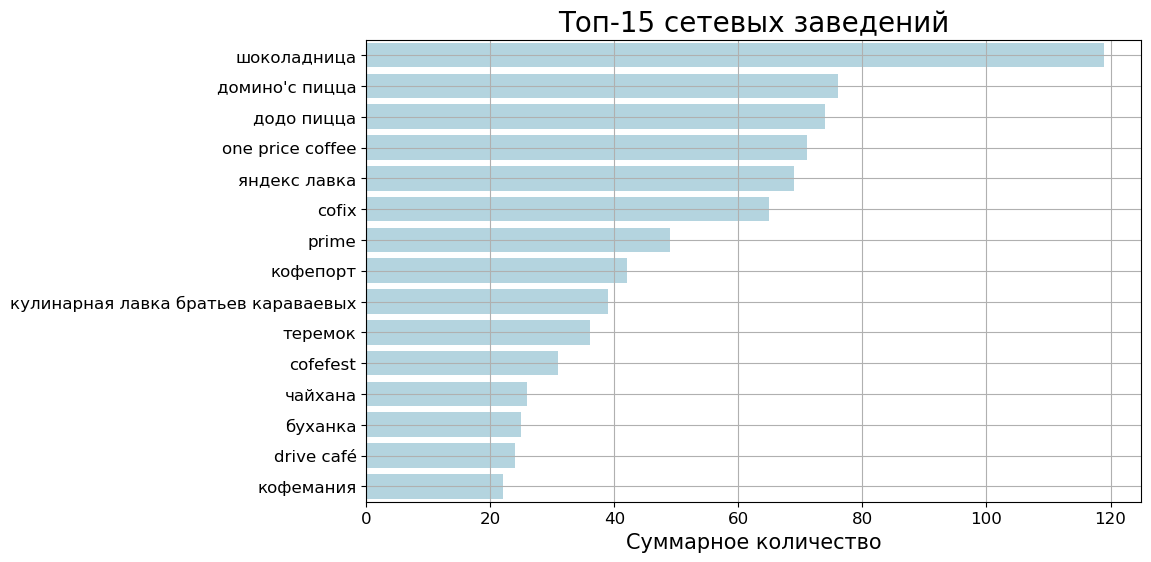

In [58]:

df_chain = (df[df['chain']== 1])
# Группировка по столбцу 'Category' и суммирование значений
grouped_df = df_chain.groupby(['name', 'category'])['id'].count().reset_index()

# Сортировка по убыванию и выбор топ-15
top_15 = grouped_df.sort_values(by='id', ascending=False).head(15)

# Построение диаграммы
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='id', y='name', data=top_15, color='lightblue')
plt.title('Топ-15 сетевых заведений', fontsize=20)
plt.xlabel('Суммарное количество', fontsize=15)
plt.ylabel(None)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

Построим ТОП - 15 наиболее популярных заведений по их рейтингу

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\1861419088.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_chain.groupby(['name', 'category'])['id'].count().reset_index()
C:\Users\urize\AppData\Local\Temp\ipykernel_12260\1861419088.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_chain.groupby(['name','category'])[['id','rating']].agg({'id':'count','rating':'mean'}).reset_index()


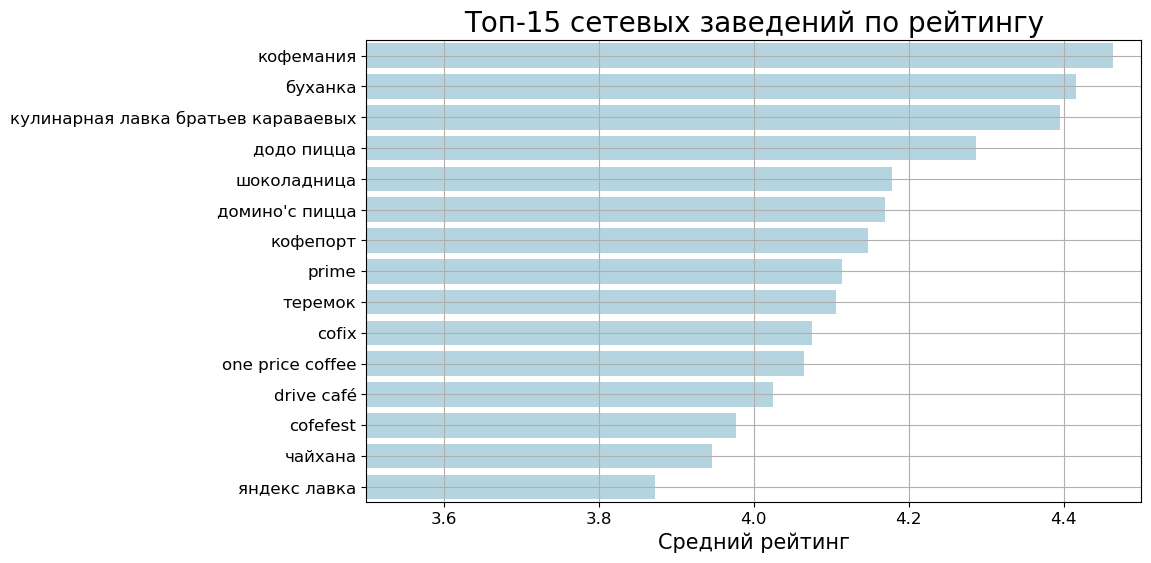

In [59]:
df_chain = (df[df['chain']== 1])
grouped_df = df_chain.groupby(['name', 'category'])['id'].count().reset_index()
# Группировка по столбцу 'name' и суммирование значений
grouped_df = df_chain.groupby(['name','category'])[['id','rating']].agg({'id':'count','rating':'mean'}).reset_index()
top_15 = grouped_df.sort_values(by='id', ascending=False).head(15)
top_15_rating = top_15.sort_values(by='rating', ascending=False)['name'].unique()
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='rating' , y='name', data=top_15, order=top_15_rating, color='lightblue')
plt.title('Топ-15 сетевых заведений по рейтингу', fontsize=20)
plt.xlabel('Средний рейтинг', fontsize=15)
plt.ylabel(None)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(3.5,4.5)
plt.grid()
plt.show()

Самый высокий рейтинг сетевых заведений имеют `кофемания` (4.46),`буханка` (4.42) и `кулинарная лавка братьев караваевых` (4.4)

Исследуем топ 5 категорий заведений ОП

In [60]:
df_chain = (df[df['chain']== 1])
# Группировка по столбцу 'Category' и суммирование значений
group_cat_df = df_chain.groupby('category')['id'].count().reset_index()
# Сортировка по убыванию и выбор топ-15
top_5_cat = group_cat_df.sort_values(by='id', ascending=False).head(5)
top_5_cat

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\3638204116.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_cat_df = df_chain.groupby('category')['id'].count().reset_index()


,category,id
3,кафе,779
6,ресторан,729
4,кофейня,720
5,пиццерия,330
2,быстрое питание,232


C:\Users\urize\AppData\Local\Temp\ipykernel_12260\3665025963.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_cat_df = df_chain.groupby('category')['id'].count().reset_index()


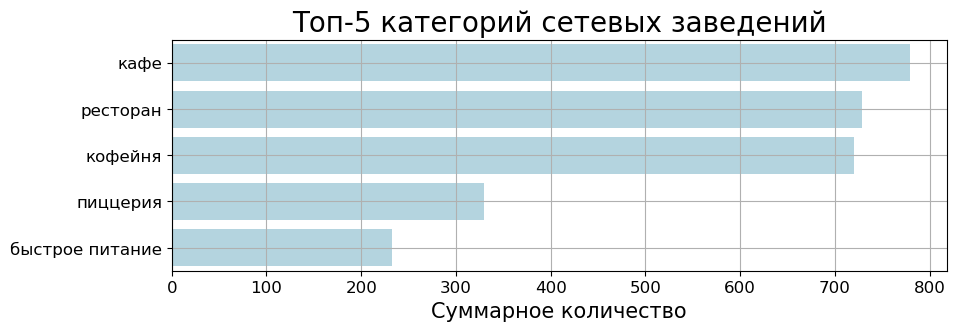

In [61]:
df_chain = (df[df['chain']== 1])
# Группировка по столбцу 'Category' и суммирование значений
group_cat_df = df_chain.groupby('category')['id'].count().reset_index()
# Сортировка по убыванию и выбор топ-15
top_5_cat = group_cat_df.sort_values(by='id', ascending=False).reset_index().head(5)
top_5_order = top_5_cat.sort_values(by='id', ascending=False)['category'].unique()
# Построение диаграммы
plt.figure(figsize=(10, 3))
ax=sns.barplot(x='id', y='category', data=top_5_cat, order=top_5_order, color='lightblue')
plt.title('Топ-5 категорий сетевых заведений', fontsize=20)
plt.xlabel('Суммарное количество', fontsize=15)
plt.ylabel(None)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

В топе самых популярных сетевых заведений ОП в Москве: `"Шоколадница"` (119), `"Домино'с пицца"` (76), `"Додо пицца"` (74).В скобках число заведений. По рейтингу среди сетевых лидируют `"кофемания"` (4,46), `"Буханка"` (4,42) "Кулинарная лавка братьев караваевых" (4,39).
Самые популярные категории заведений: `кафе` (779), `рестораны` (729) и `кофейни` (720). В скобках число сетевых заведений в данной категории

---

### Задача 8

Изучить вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализировать цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводить подходящими визуализациями.


Выводим общую информацию по среднему чеку в разрезе округов Москвы

In [62]:
df_AO=df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).reset_index()
df_AO

C:\Users\urize\AppData\Local\Temp\ipykernel_12260\1549444744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_AO=df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).reset_index()


,district,middle_avg_bill
0,центральный административный округ,1191.057547
1,западный административный округ,1053.22549
2,северный административный округ,927.959627
3,южный административный округ,834.398089
4,северо-западный административный округ,822.22293
5,восточный административный округ,820.626923
6,юго-западный административный округ,792.561702
7,северо-восточный административный округ,716.611296
8,юго-восточный административный округ,654.097938


Построим линейчатую диаграмму с сортировкой от большего к меньшему значениям среднего чека

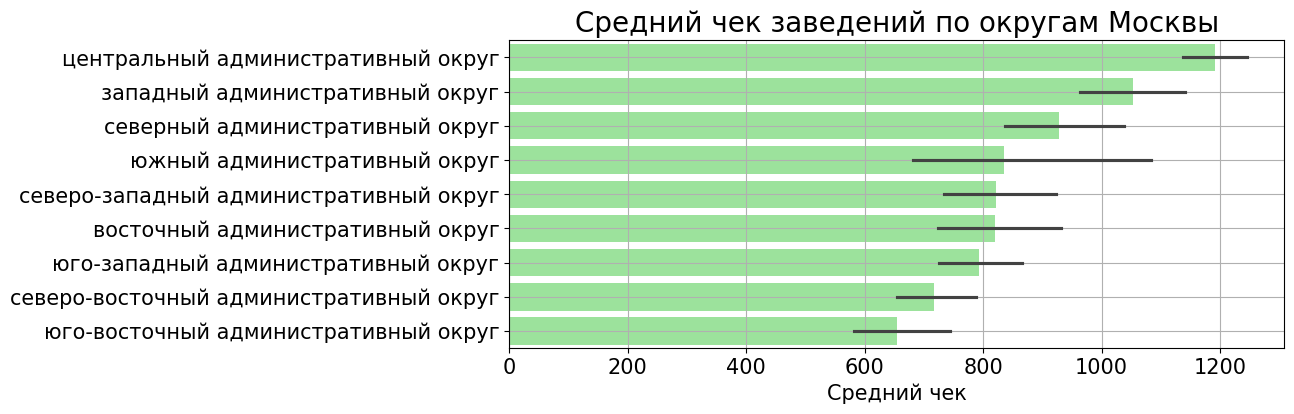

In [63]:
plt.figure(figsize=(10, 4))
order = df.sort_values('middle_avg_bill')['district'].unique()
ax=sns.barplot(x='middle_avg_bill', 
               y='district', 
               data=df,
               order=df_AO['district'],
               color='lightgreen')
plt.title('Средний чек заведений по округам Москвы', fontsize=20)
plt.xlabel('Средний чек', fontsize=15)
plt.ylabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
plt.show()

Самый высокий средний чек заведений (1191 р.)в Центральном административном округе Москвы. Удаленность от центра понижает средний чек заведения

Условно поделим округа Москвы на 2 группы:

`высокие по среднему чеку`: 
- центральный административный округ,
- западный административный округ,
- северный административный округ,
- южный административный округ	

`низкие по среднему чеку`:
- северо-западный административный округ	
- восточный административный округ	
- юго-западный административный округ	
- северо-восточный административный округ	
- юго-восточный административный округ	

Построим для каждой группы плотности распределения значений среднего чека

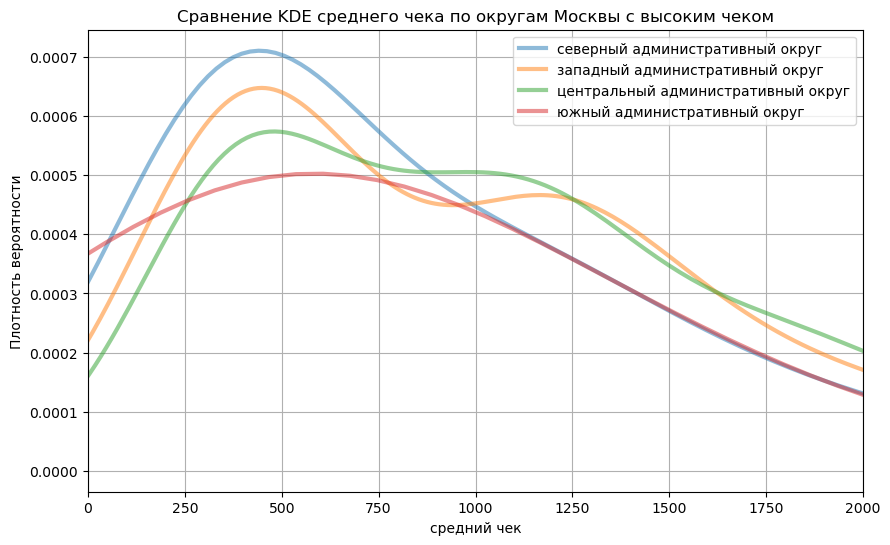

In [64]:
plt.figure(figsize=(10, 6))
for i in df['district'].unique():
    if (i == 'юго-восточный административный округ') or (i == 'северо-восточный административный округ')or (i == 'юго-западный административный округ') or (i == 'восточный административный округ') or (i== 'северо-западный административный округ'):
        continue
    df.loc[df['district'] == i, 'middle_avg_bill'].plot(
        kind='kde',
        alpha=0.5,
        label=f'{i}',
        xlim=[0,2000],
        legend=True,
        linewidth=3)
plt.title(f'Сравнение KDE среднего чека по округам Москвы c высоким чеком')
plt.xlabel('средний чек')
plt.ylabel('Плотность вероятности')
plt.grid()
plt.show()

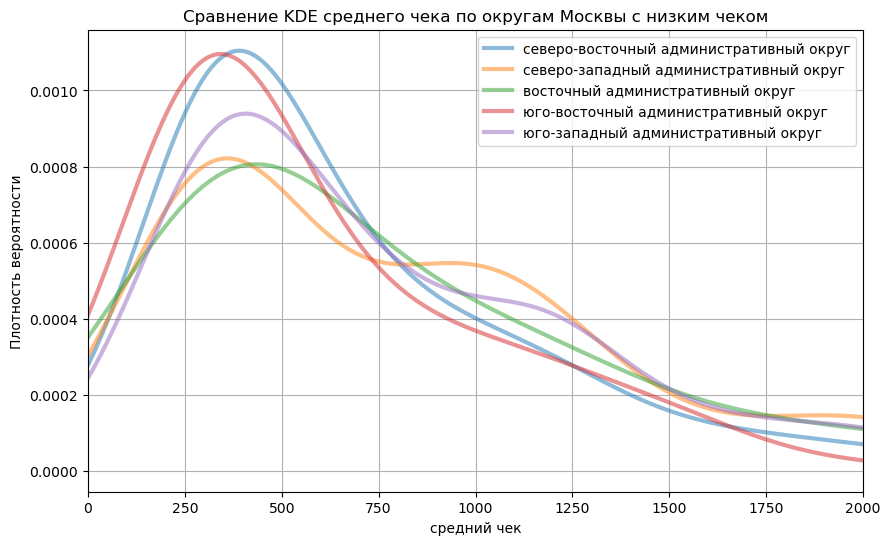

In [65]:
plt.figure(figsize=(10, 6))
for i in df['district'].unique():
    if (i == 'центральный административный округ') or (i == 'западный административный округ')or (i == 'северный административный округ') or (i == 'южный административный округ'):
        continue
    df.loc[df['district'] == i, 'middle_avg_bill'].plot(
        kind='kde',
        alpha=0.5,
        label=f'{i}',
        xlim=[0,2000],
        legend=True,
        linewidth=3)
plt.title(f'Сравнение KDE среднего чека по округам Москвы с низким чеком')
plt.xlabel('средний чек')
plt.ylabel('Плотность вероятности')
plt.grid()
plt.show()

Как видно для высокой группы характерен большой разброс значений среднего чека. Что говорит о большом разнообразии заведений и цен и их большем количестве, а также близость к центру как выяснилось из предыдущего анализа коррелирует с повышением цены.
Для низкой группы значения более сфокусированы около максимума, то есть меньшее разнообразие и удаленность от центра делают значения среднего чека меньше с меньшим разбросом.

---

### Промежуточный вывод

Обобщим полученные результаты, выделив, по нашему мнению, самые важные.

Наиболее распространенные сетевые заведения кафе(779), рестораны(729) и кофейни(720)
Чаще являются сетевыми булочные(61,3 %), пиццерии(52,1 %) и кофейни(51 %)- Согласно представленным данным общее количество заведений общественного питания: 8402
- Количество несетевых заведений ОП: 5199
- Количество сетевых заведений ОП: 3203
- Процент сетевых заведений ОП от общего числа заведений: 38.1 %
- Процент заведений круглосуточного типа от общего числа заведений: 8.7 %
- В общем преобладают категории `кафе` 28.3 %(общ.2376, сетевых 779, В ЦАО 464), `ресторан` 24.3 %(общ.2042, сетевых 729, В ЦАО 670), `кофейня` 16.8 % (общ.1413, сетевых 720, В ЦАО 428)
- Чаще являются сетевыми булочные(61,3 %), пиццерии(52,1 %) и кофейни(51 %)
- С большим отрывом преобладают заведения ОП среднего ценового диапазона (2117). Заведений с низкими ценами меньше всего (156)
- Рынок общественного питания Москвы сегментируется 9 административными округами. Максимальная концентрация объектов ОП в Центральном административном округе Москвы (2242). Минимальная в Северо-западном (409)
- Самые неразвитые по сетевому признаку заведений ОП округи Москвы `юго-восточный` 30.8 %, `южный` 35.0 %, `восточный` 35.5 %
- В ресторанах (80), кофейнях (75) и бар,пабах (80) наибольшее число посадочных мест. В скобках медианное значение числа мест.
- Средний рейтинг всех категорий заведений находится в небольших пределах от 4 до 4.4. Среди них выделяются бар,пабы (4,38), пиццерии (4,30) и рестораны (4,29) имеющие самый высокий средний рейтинг. Категории быстрого питания (4,05), кафе (4,12) и столовые (4,21) имеют более низкий рейтинг. 
- Чем выше ценовая категория заведения ОП, тем выше его пиковый рейтинг и тем меньше диапазон значений рейтинга
- В топе самых популярных сетевых заведений ОП в Москве: `"Шоколадница"` (119), `"Домино'с пицца"` (76), `"Додо пицца"` (74).В скобках число заведений.
- По рейтингу среди сетевых лидируют `"кофемания"` (4,46), `"Буханка"` (4,42) `"Кулинарная лавка братьев караваевых"` (4,39). В скобках средний рейтинг
- Самый высокий средний чек заведений (1191 р.) в Центральном административном округе Москвы. Удаление от центра понижает средний чек заведения.

## Итоговый вывод и рекомендации


В проведенном ииследовании проанализировали рынок общественного питания города Москвы. В распоряжении было 8402 объекта общепита в разных административных округах. Предоставленные данные включали общую информацию о заведениях и ценах за их услуги. Акцент исследования был направлен на выяснение факторов, влияющих на успешность, то есть прибыльность инвестиций заказчика. Целью исследования было выявление к какой категории будет относиться будущее заведение, а также его расположении и ценовом сегменте для него. 

- В ходе исследования выяснилось, что самые популярные заведения общественного питания `сетевого` типа относятся к категориям `кафе` (общ.2376, сетевых 779, В ЦАО 464), `ресторан` (общ.2042, сетевых 729, В ЦАО 670), `кофейня` (общ.1413, сетевых 720, В ЦАО 428)
- Самые высокие цены в заведениях в Центральном административном округе Москвы (1191 р.-средний чек) . По мере удаления от центра значение среднего чека понижается.
- Чем выше ценовая категория заведения ОП, тем выше его пиковый рейтинг.
- В целом преобладают заведения ОП среднего ценового диапазона (2117). Заведений с низкими ценами меньше всего (156)

***Рекомендации***

Популярность, то есть число заведений определенного типа свидетельствует об успешном бизнесе в сфере общественного питания. К таким объектам относятся прежде всего заведения `сетевого` типа `средней ценовой категории`, которые составляют 38,1 %, то есть ещё пока меньшую долю от общего числа.  
- В связи с этим рекомендуется сетевое заведение популярной категории c высоким процентом от общего числа сетевых: `кафе` 28.3 %, `ресторан` 24.3 %, `кофейня` 16.8 %, `пиццерия` 7.5 %;
- в административном округе Москвы с низким процентом сетевых заведений: `Юго-восточный` 30.8 %, `Восточный` 35.5 % и `Южный` 30.5 %; или ещё не развитой конкретной сетью в других округах. 
- Самые многочисленные сетевые заведения общественного питания со средней ценовой категорией с числом посадочных мест 50-80 это `Шоколадница` (119), `Домино'c пицца`(76), `Додо пицца`(74) и `one price coffee` (71) 
- Также стоит ориентироваться на рейтинг, то есть престиж заведения. Самый высокий рейтинг сетевых заведений имеют `кофемания` (4.46),`буханка` (4.42) и `кулинарная лавка братьев караваевых` (4.4) и `додо пицца` (4.3)
  
Дополнительно можно провести анализ распределения конкретных популярных сетевых заведений по административным округам Москвы.